# Hacaton ADA | Ifood - Grupo DD-9

## Introdução

### Através da análise dos dados da empresa, buscamos identificar áreas de desequilíbrio na diversidade.

### Nosso objetivo é identificar padrões de diversidade e desequilíbrios nos dados e propor soluções para promover a inclusão e equidade na Corp Solutions.

## Instalando as bibliotecas

In [79]:
!pip install skimpy
!pip install pandas
!pip install ftfy
!pip install pywaffle
!pip install scikit-learn

## Importando as bibliotecas

In [80]:
# Bibliotecas padrão
import numpy as np

# Bibliotecas de visualização
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

# Bibliotecas de manipulação de dados
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Bibliotecas de utilidades
from ftfy import fix_text
from skimpy import skim

## Verificando as informações básicas do Dataset

In [81]:
# Carregando o dataset e verificando principais informações
dataset_ada_path = "../../base_dados/base_de_dados.csv"
df = pd.read_csv(dataset_ada_path)
df.head()

,id,id.1,Nome,Genero,Idade,RaÃ§a,EndereÃ§o,FormaÃ§Ã£o,Estado,Tempo de casa,Departamento,Senioridade
0,1,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34.0,pardo,"9155 Harold Oval\r\nSellersside, FL 21337",Ensino MÃ©dio,Santa Catarina,12.0,Compras,Analista Pleno
1,2,2,ElisÃ¢ngela Gabrielle de OsÃ³rio,Fem,26.0,pardo,"941 Martin Manor\r\nLake Isaiahtown, FM 43797",Ensino MÃ©dio,ParÃ¡,6.0,Contabilidade,Analista JÃºnior
2,3,3,JosÃ© TÃºlio de Cabral,Masc,35.0,pardo,"110 Davis Ridges\r\nMejiaville, LA 17095",Ensino MÃ©dio,Santa Catarina,5.0,Vendas,Analista Pleno
3,4,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24.0,pardo,"48010 Wilson Glen Apt. 749\r\nSmithborough, NV...",Ensino Superior,Tocantins,4.0,Administrativo,Gerente
4,5,5,Fagner Josiel dos Santos,Masc,21.0,pardo,"8666 Ramos Ports Apt. 070\r\nSandraport, MN 33570",Ensino Superior,CearÃ¡,5.0,Recursos Humanos,Analista JÃºnior


### Usando o Skimpy para visualização

In [82]:
# Gerando resumo usando a biblioteca skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ id                 │     0 │      0 │   5000 │   2900 │    1 │   2500 │   5000 │   7500 │  10000 │ ▇▇▇▇▇▇  │  │
│ │ id.1               │     0 │      0 │   5000 │   2900 │    1 │   2500 │   5000 │   7500 │  10000 │ ▇▇▇▇▇▇  │  │
│ │ Idade              │    56 │   0.56 │     31 │    8.7 │    5 │     24 │     30 │     37 │     74 │   ▇▇▃   │  │
│ │ Tempo de casa      │   200 │      2 │    5.5 │      3 │   -6 │      3 │      5 │      8 │     17 │   ▂▇▇▂  │  │
│ └────────────────────┴───────┴────────┴────────┴────────┴──────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Nome                       │      0 │          0 │                            4 │                    39915 │  │
│ │ Genero                     │      0 │          0 │                            1 │                    10000 │  │
│ │ RaÃ§a                      │      0 │          0 │                            1 │                    10000 │  │
│ │ EndereÃ§o                  │      0 │          0 │                          6.4 │                    63731 │  │
│ │ FormaÃ§Ã£o                 │     44 │       0.44 │                          1.8 │                    17922 │  │
│ │ Estado                     │      0 │          0 │                          1.8 │                    18220 │  │
│ │ Departamento               │      0 │          0 │                          1.3 │                    13333 │  │
│ │ Senioridade                │      0 │          0 │                          1.8 │                    17500 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Usando o Pandas para extrair informações básicas

In [83]:
# Verificando informações
df.shape

(10000, 12)

In [84]:
# Verificando tipos de dados
df.dtypes

id                 int64
id.1               int64
Nome              object
Genero            object
Idade            float64
RaÃ§a             object
EndereÃ§o         object
FormaÃ§Ã£o        object
Estado            object
Tempo de casa    float64
Departamento      object
Senioridade       object
dtype: object

In [85]:
# Verificando valores nulos
df.isnull().sum()

id                 0
id.1               0
Nome               0
Genero             0
Idade             56
RaÃ§a              0
EndereÃ§o          0
FormaÃ§Ã£o        44
Estado             0
Tempo de casa    200
Departamento       0
Senioridade        0
dtype: int64

In [86]:
# Validando que cada id seja único
df["id"].unique()

array([    1,     2,     3, ...,  9998,  9999, 10000], dtype=int64)

## Tratamento de dados


In [87]:
# Identificar as colunas
df.columns
# Não vamos trabalhar com a coluna de nomes, para nossas analises e dados disponiveis não é relevante.
# Além disso, a coluna coluna apresenta valores senciveis, optamos por remove-la em acordo com a LGPD.

Index(['id', 'id.1', 'Nome', 'Genero', 'Idade', 'RaÃ§a', 'EndereÃ§o',
       'FormaÃ§Ã£o', 'Estado', 'Tempo de casa', 'Departamento', 'Senioridade'],
      dtype='object')

In [88]:
# Desprezar coluna duplicada
df.drop(columns=["id.1"], inplace=True)
df.columns

Index(['id', 'Nome', 'Genero', 'Idade', 'RaÃ§a', 'EndereÃ§o', 'FormaÃ§Ã£o',
       'Estado', 'Tempo de casa', 'Departamento', 'Senioridade'],
      dtype='object')

In [89]:
# Corrigir caracteres nas colunas
df.columns = [fix_text(coluna) for coluna in df.columns]

colunas_corrigir = [
    "Nome",
    "Genero",
    "Raça",
    "Endereço",
    "Formação",
    "Estado",
    "Departamento",
    "Senioridade",
]

# Corrigir caracteres nas respectivas colunas
for coluna in colunas_corrigir:
    df[coluna] = df[coluna].apply(lambda x: fix_text(str(x)))

In [90]:
# Renomear colunas com erro de formatação
df.rename(columns={"Genero": "Gênero"}, inplace=True)
df.columns

Index(['id', 'Nome', 'Gênero', 'Idade', 'Raça', 'Endereço', 'Formação',
       'Estado', 'Tempo de casa', 'Departamento', 'Senioridade'],
      dtype='object')

In [91]:
# Verificandos os valores do campo Gênero
df["Gênero"].unique()


# Apenas dois gêneros: Fem / Masc

# Não existem pessoas que se identificam de outra maneira

# ou o banco de dados não suporta informação diferente?

array(['Fem', 'Masc'], dtype=object)

In [92]:
# Os termos 'amarelo' e 'preto' podem ser considerados preconceituosos, seria melhor renomear

mapeamento = {"amarelo": "asiático", "preto": "negro"}
df["Raça"] = df["Raça"].replace(mapeamento)
df["Raça"].unique()

array(['pardo', 'negro', 'branco', 'indígena', 'asiático'], dtype=object)

In [93]:
df["Formação"].unique()

# presença de valor 'nan' !!! inconsistência do banco de dados ? Ponto a ser verificado!
# o que seria pós graduação? especialização?

array(['Ensino Médio', 'Ensino Superior', 'Pós graduação', 'Mestrado',
       'Doutorado', 'nan'], dtype=object)

In [94]:
df["Estado"].unique()

# Presença de todos os 27 estados e distrito federal
# São estados de residência ou nascimento?

array(['Santa Catarina', 'Pará', 'Tocantins', 'Ceará', 'São Paulo',
       'Rondônia', 'Amapá', 'Minas Gerais', 'Acre', 'Roraima', 'Amazonas',
       'Paraná', 'Bahia', 'Piauí', 'Goiás', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Pernambuco', 'Mato Grosso',
       'Rio Grande do Sul', 'Espírito Santo', 'Maranhão', 'Paraíba',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Alagoas'],
      dtype=object)

In [95]:
print(df["Endereço"].unique())

# Verificamos o endereço numa tentiva de entender se a coluna "Estado" diz respeito ao nascimento ou
# à residência
# Porém, os endereços são estrangeiros. Será um problema do dataset ou apenas do gerar de dados?

['9155 Harold Oval\nSellersside, FL 21337'
 '941 Martin Manor\nLake Isaiahtown, FM 43797'
 '110 Davis Ridges\nMejiaville, LA 17095' ...
 '41179 Tracie Parkways\nLangfort, IA 88137'
 '902 Luis Island\nBrownton, NJ 61984'
 '72486 Diaz Springs Suite 182\nNew Thomasview, AR 49434']


In [96]:
# Verificar departamentos unicos
df["Departamento"].unique()

array(['Compras', 'Contabilidade', 'Vendas', 'Administrativo',
       'Recursos Humanos', 'Operações', 'Desenvolvimento de Produtos',
       'Marketing', 'TI'], dtype=object)

In [97]:
df["Senioridade"].unique()

# Um erro de digitação faz com que 'Gerente' seja um cargo e 'gerente' seja outro cargo
# Corrigimos a digitação para reunir ambos em uma mesma categoria

df["Senioridade"] = df["Senioridade"].replace("gerente", "Gerente")
df["Senioridade"].unique()

array(['Analista Pleno', 'Analista Júnior', 'Gerente', 'Analista Sênior',
       'Estagiário', 'Diretor'], dtype=object)

In [98]:
idades = sorted(df["Idade"].unique())
idades

# Temos um grande problema com as idades, pois além de identificarmos idades abaixo da maioridade legal,
# também identificamos valores 'nan'

[5.0,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 nan,
 57.0,
 58.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 68.0,
 74.0]

In [99]:
idades_erradas = df[(df["Idade"] < 18) | df["Idade"].isna()]
count_idades_erradas = len(idades_erradas)
count_idades_erradas

# Total de 112 pessoas com registro de idade abaixo da maioridade legal ou com valor 'nan'
# Não chega a ser um valor expressivo, considerando o tamanho total do dataset
# mas indica problemas no código do banco de dados e coloca a dúvida a correção das demais informações

112

In [100]:
t_casa = sorted(df["Tempo de casa"].unique())
t_casa

# Também na coluna Tempo de Casa encontramos problemas, pois há tempo de casa negativo e valor 'nan'

[-6.0,
 -5.0,
 -3.0,
 -2.0,
 -1.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 11.0,
 12.0,
 nan,
 10.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0]

In [101]:
t_casa_errados = df[(df["Tempo de casa"] < 0) | df["Tempo de casa"].isna()]
count_t_casa_errados = len(t_casa_errados)
count_t_casa_errados

# Valores incorretos e 'nan'
# Também não são uma quantidade significativa, mas o tipo de erro é muito preocupante!

298

In [102]:
# Atualizar dados do df
df.to_csv("arquivo_corrigido.csv", index=False)

#### Para uma análise correta, o certo seria desprezar esses valores "errados" e nulos, já que eles são poucos em relação ao tamanho do dataset. Porém, aqui quisemos manter esses dados para mostrar o problema de usar um banco de dados com código mal escrito!

## Análises preliminares


### Distribuição por Gênero

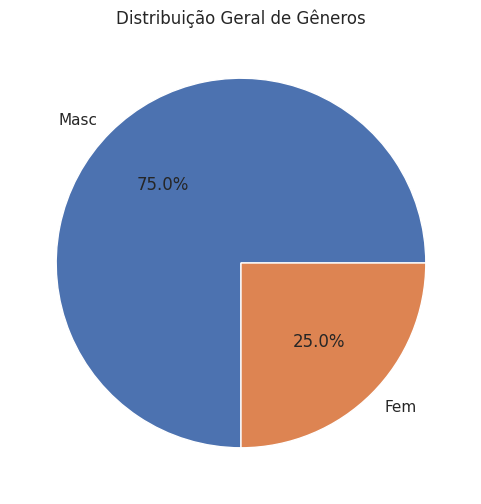

In [103]:
# Contagem de gêneros
genero_counts = df["Gênero"].value_counts()


plt.figure(figsize=(6, 6))

plt.pie(genero_counts.values, labels=genero_counts.index, autopct="%1.1f%%")
plt.title("Distribuição Geral de Gêneros")

plt.show()

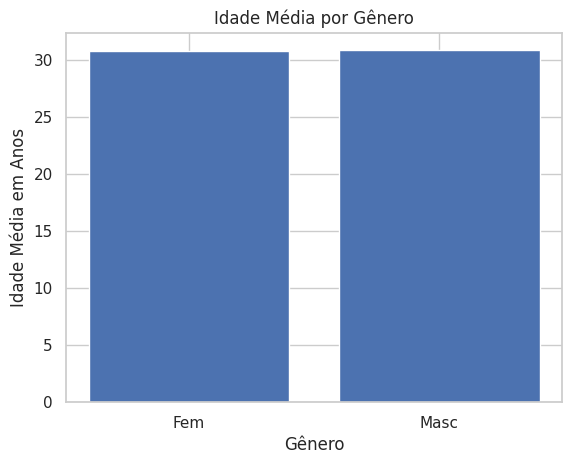

In [104]:
# Verificando a idade média por gênero
idade_genero_medio = df.groupby("Gênero")["Idade"].mean()


plt.bar(idade_genero_medio.index, idade_genero_medio.values)

plt.xlabel("Gênero")

plt.ylabel("Idade Média em Anos")
plt.title("Idade Média por Gênero")

plt.show()


# Médida de idade entre os gêneros também é similar

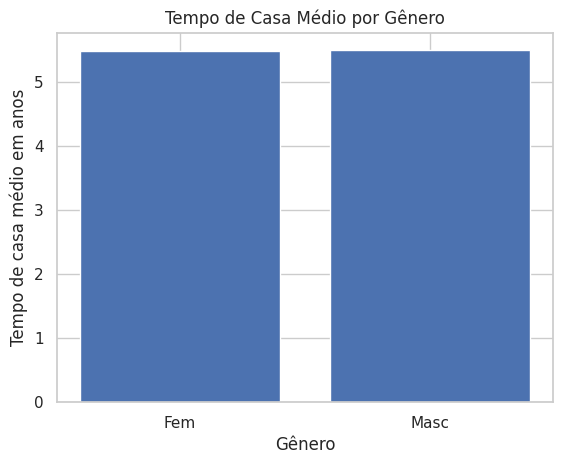

In [105]:
tempo_genero_medio = df.groupby("Gênero")["Tempo de casa"].mean()

plt.bar(tempo_genero_medio.index, tempo_genero_medio.values)
plt.xlabel("Gênero")
plt.ylabel("Tempo de casa médio em anos")
plt.title("Tempo de Casa Médio por Gênero")
plt.show()

# O tempo de permanência na empresa é praticamente o mesmo entre os gêneros

<Figure size 800x600 with 0 Axes>

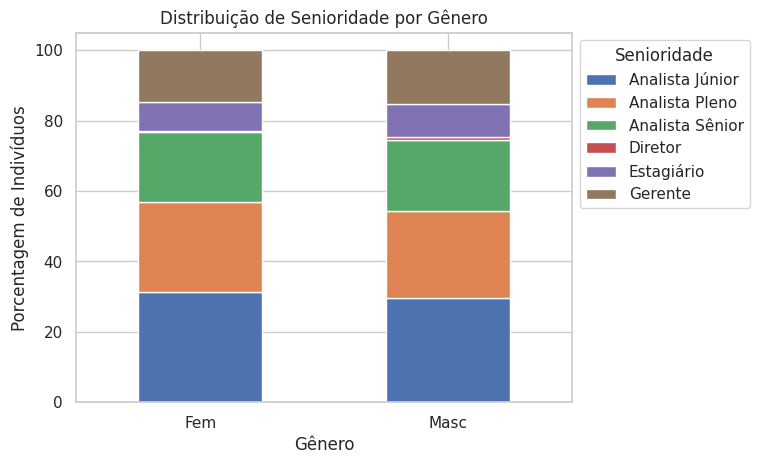

In [106]:
total_por_genero = df.groupby("Gênero")["Senioridade"].count()
total_por_senioridade_por_genero = (
    df.groupby(["Gênero", "Senioridade"]).size().unstack()
)

total_por_senioridade_por_genero_percentual = (
    total_por_senioridade_por_genero.div(total_por_genero, axis=0) * 100
)

plt.figure(figsize=(8, 6))
total_por_senioridade_por_genero_percentual.plot(kind="bar", stacked=True)
plt.ylabel("Porcentagem de Indivíduos")
plt.title("Distribuição de Senioridade por Gênero")
plt.legend(title="Senioridade", bbox_to_anchor=(1, 1), loc="upper left")
plt.xticks(rotation=0)
plt.show()

# Os homens são maioria, mas as mulheres estão presentes em todos os níveis de senioridade,
# Ponto a melhorar: a quantidade de mulheres em cargos de liderança é muito baixa

<Figure size 1500x600 with 0 Axes>

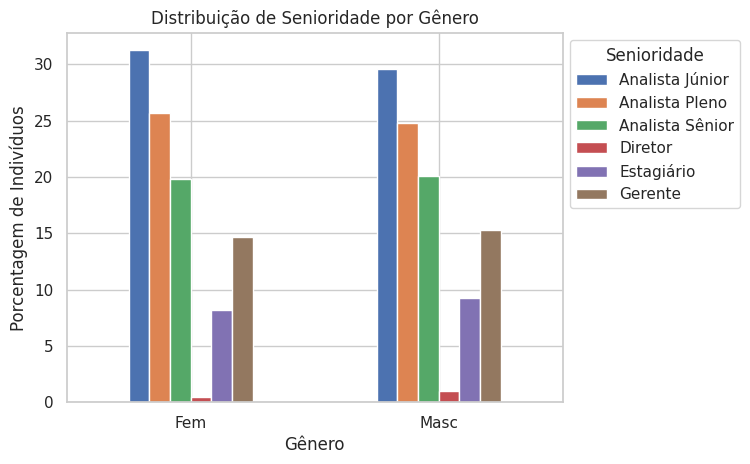

In [107]:
total_por_genero = df.groupby("Gênero")["Senioridade"].count()
total_por_senioridade_por_genero = (
    df.groupby(["Gênero", "Senioridade"]).size().unstack()
)

total_por_senioridade_por_genero_percentual = (
    total_por_senioridade_por_genero.div(
        total_por_senioridade_por_genero.sum(axis=1), axis=0
    )
    * 100
)

plt.figure(figsize=(15, 6))
total_por_senioridade_por_genero_percentual.plot(kind="bar", stacked=False)
plt.ylabel("Porcentagem de Indivíduos")
plt.title("Distribuição de Senioridade por Gênero")
plt.legend(title="Senioridade", bbox_to_anchor=(1, 1), loc="upper left")
plt.xticks(rotation=0)
plt.show()

# Aqui podemos observar que há diferença na quantidade de diretores, maior para os homens.

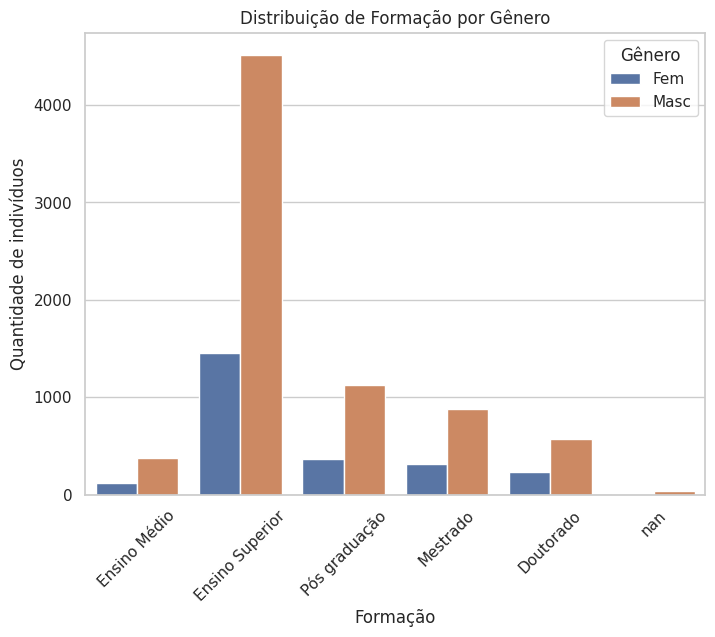

In [108]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Formação", hue="Gênero", data=df)
plt.xticks(rotation=45)
plt.ylabel("Quantidade de indivíduos")
plt.title("Distribuição de Formação por Gênero")
plt.legend(title="Gênero")
plt.show()

# Os gêneros estão distribuídos de maneira proporcional entre os níveis de formação

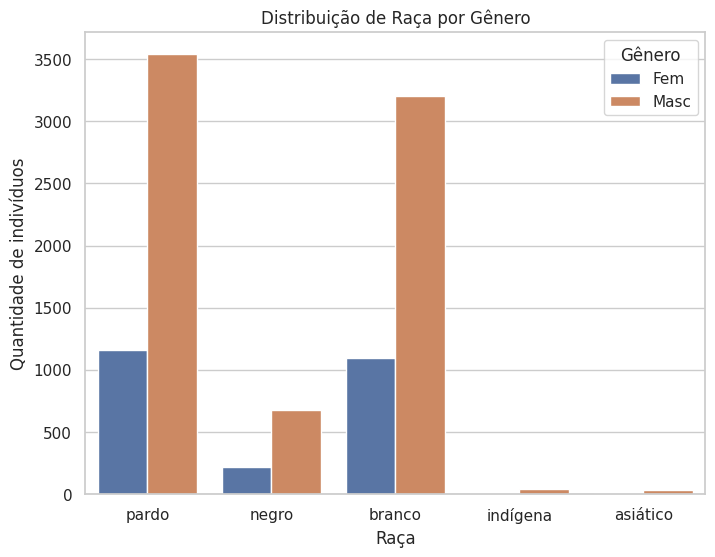

In [109]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Raça", hue="Gênero", data=df)
plt.ylabel("Quantidade de indivíduos")
plt.title("Distribuição de Raça por Gênero")
plt.legend(title="Gênero")
plt.show()

# Todas as raças contam com representantes de ambos os gêneros, em proporções equivalentes.

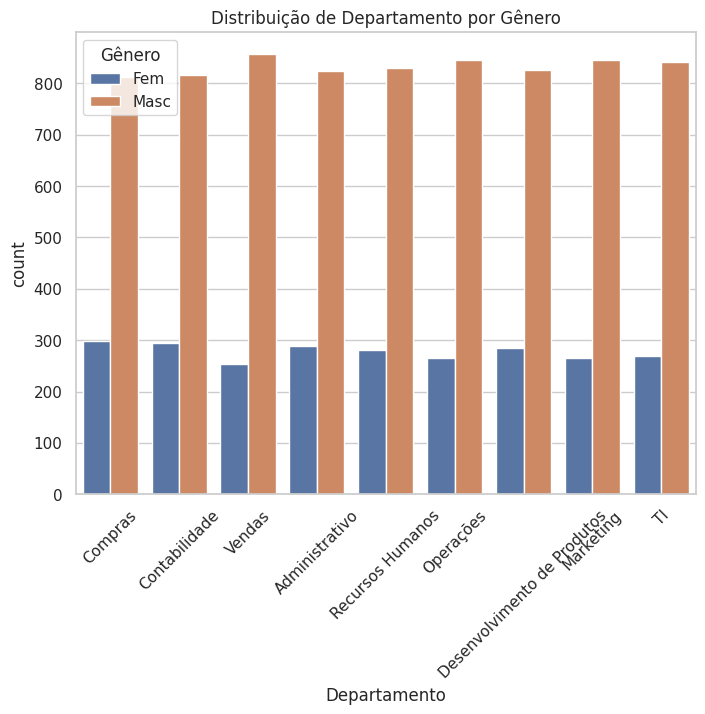

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Departamento", hue="Gênero", data=df)
plt.xticks(rotation=45)
plt.title("Distribuição de Departamento por Gênero")
plt.legend(title="Gênero")
plt.show()

# Os departamentos parecem ter uma distribuição uniforme entre os gêneros
# O departamento de vendas é o que tem menos mulheres.

In [111]:
# Atualização do mapeamento de estados para regiões
regioes = {
    "Acre": "Norte",
    "Alagoas": "Nordeste",
    "Amapá": "Norte",
    "Amazonas": "Norte",
    "Bahia": "Nordeste",
    "Ceará": "Nordeste",
    "Distrito Federal": "Centro-Oeste",  # Alterado para incluir o hífen
    "Espírito Santo": "Sudeste",
    "Goiás": "Centro-Oeste",  # Alterado para incluir o hífen
    "Maranhão": "Nordeste",
    "Mato Grosso": "Centro-Oeste",  # Alterado para incluir o hífen
    "Mato Grosso do Sul": "Centro-Oeste",  # Alterado para incluir o hífen
    "Minas Gerais": "Sudeste",
    "Pará": "Norte",
    "Paraíba": "Nordeste",
    "Paraná": "Sul",
    "Pernambuco": "Nordeste",
    "Piauí": "Nordeste",
    "Rio de Janeiro": "Sudeste",
    "Rio Grande do Norte": "Nordeste",
    "Rio Grande do Sul": "Sul",
    "Rondônia": "Norte",
    "Roraima": "Norte",
    "Santa Catarina": "Sul",
    "São Paulo": "Sudeste",
    "Sergipe": "Nordeste",
    "Tocantins": "Norte",
}

# Atualizar a coluna 'Região' com os nomes corrigidos
df["Região"] = df["Estado"].map(regioes)

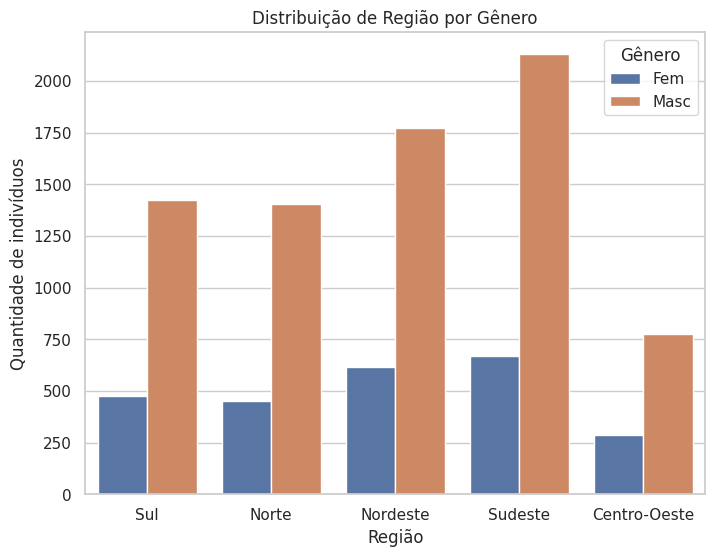

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Região", hue="Gênero", data=df)
plt.ylabel("Quantidade de indivíduos")
plt.title("Distribuição de Região por Gênero")
plt.legend(title="Gênero")
plt.show()

# A distribuição de gênero por região também é uniforme, sem discrepâncias visível

* ## Distribuição por Raça

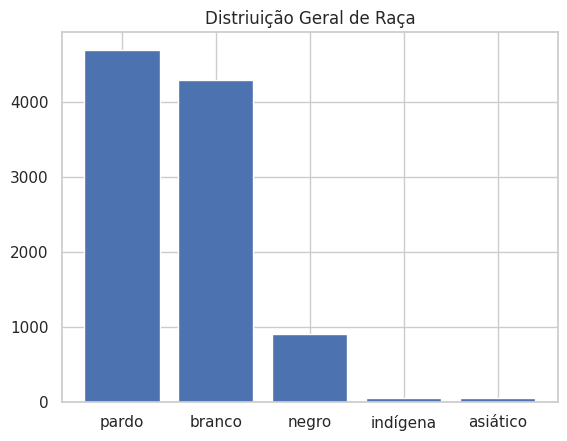

In [113]:
soma_racas = df["Raça"].value_counts()

plt.bar(soma_racas.index, soma_racas.values)
plt.title("Distriuição Geral de Raça")
plt.show()

# Forte presença de pardos e brancos, presença considerável de negros.
# Indígenas e asiáticos são uma pequena minoria

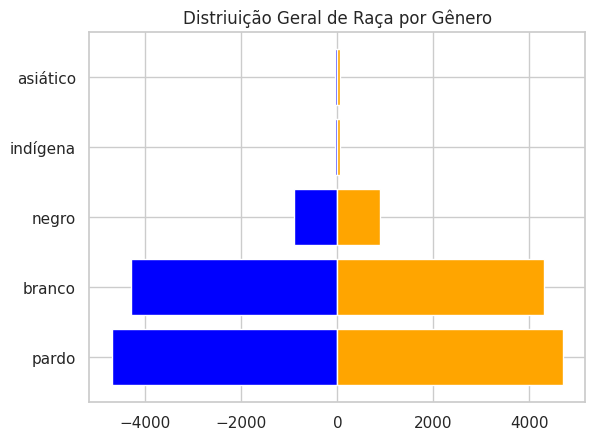

In [114]:
# Verificando a distribuição geral de raça por gênero:

# Cria um índice baseado no número de raças

y = range(len(soma_racas.index))


fig, ax = plt.subplots()


ax.barh(y, -soma_racas.values, align="center", color="blue", zorder=10)

ax.barh(y, soma_racas.values, align="center", color="orange", zorder=10)


ax.set_yticks(y)

ax.set_yticklabels(soma_racas.index)


ax.xaxis.set_ticks_position("none")

ax.set_title("Distriuição Geral de Raça por Gênero")


plt.show()


# Essa distribuição mostra uma peqa quantidade de mulheres negras a mais que homens negros.

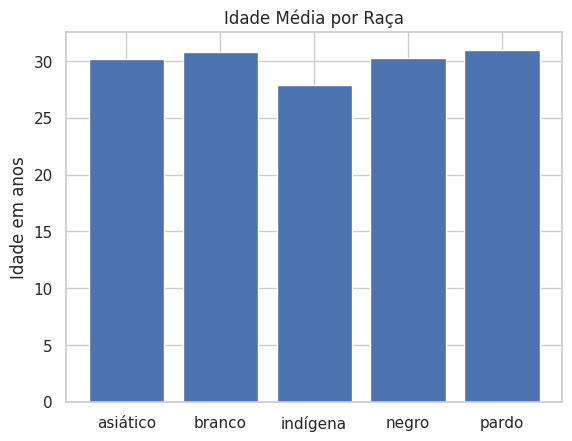

In [115]:
raca_idade = df.groupby("Raça")["Idade"].mean()

plt.bar(raca_idade.index, raca_idade.values)
plt.ylabel("Idade em anos")
plt.title("Idade Média por Raça")
plt.show()

# Idade média de todas as raças é parecida, com destaque para os indígenas, quem têm a menor idade média geral

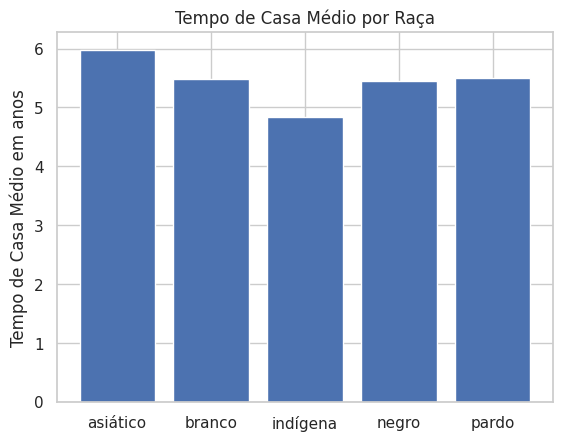

In [116]:
tempo_raca_medio = df.groupby("Raça")["Tempo de casa"].mean()

plt.bar(tempo_raca_medio.index, tempo_raca_medio.values)
plt.ylabel("Tempo de Casa Médio em anos")
plt.title("Tempo de Casa Médio por Raça")
plt.show()

# Asiáticos são os que permanecem por mais tempo na empresa, indígenas são os que permanecem menos
# Brancos, pardos e negros têm tempo de permanência similar

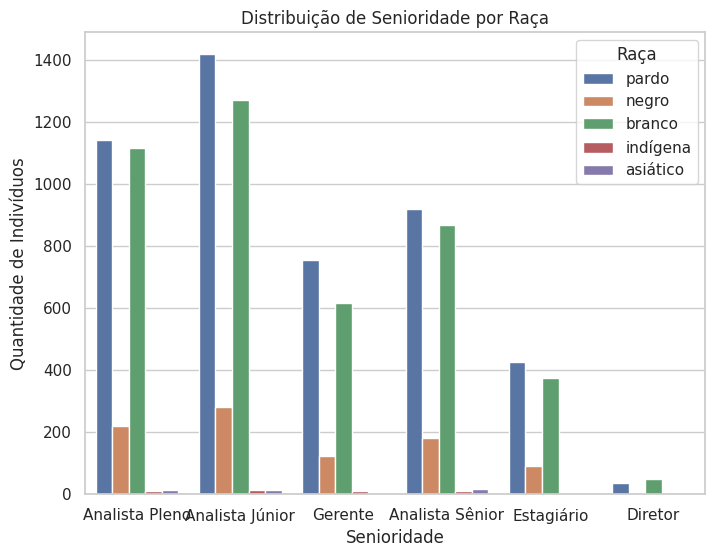

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Senioridade", hue="Raça", data=df)
plt.ylabel("Quantidade de Indivíduos")
plt.title("Distribuição de Senioridade por Raça")
plt.show()

# Todas as raças estão presentes em todos os níveis de senioridade
# Embora não haja muita discrpência entre os valores,observa-se que o cargo de diretor é mais ocupado por brancos

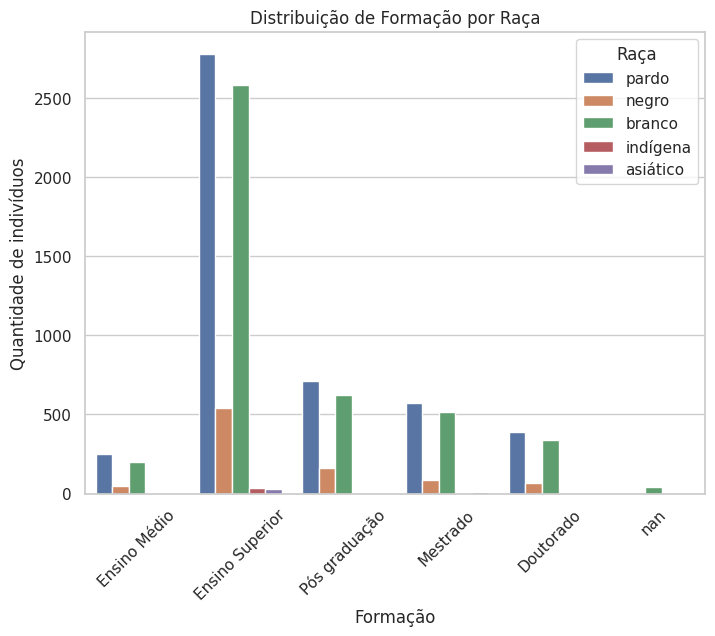

In [118]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Formação", hue="Raça", data=df)
plt.xticks(rotation=45)
plt.ylabel("Quantidade de indivíduos")
plt.title("Distribuição de Formação por Raça")
plt.legend(title="Raça")
plt.show()

# Distribuição uniforme.

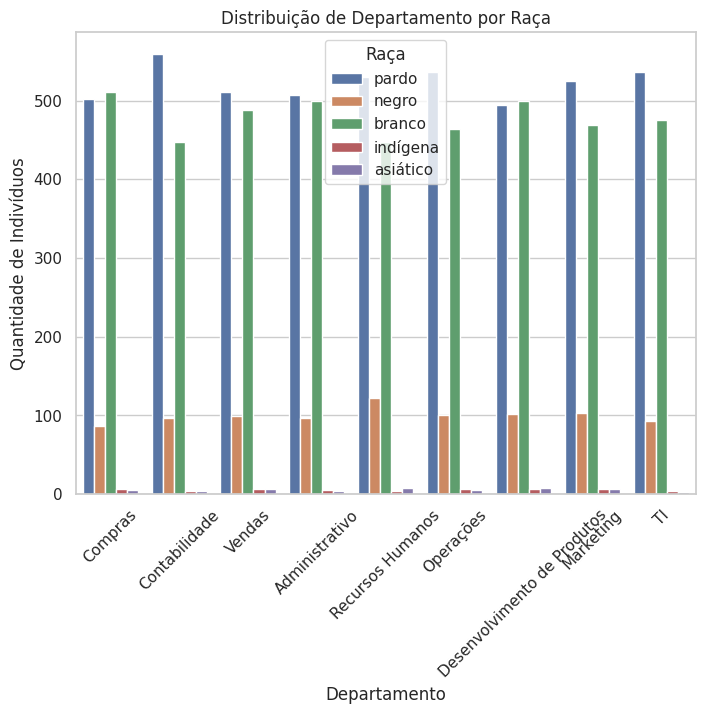

In [119]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Departamento", hue="Raça", data=df)
plt.xticks(rotation=45)
plt.ylabel("Quantidade de Indivíduos")
plt.title("Distribuição de Departamento por Raça")
plt.show()

# Existe variação dentro dos departamentos, mas em geral todos mantém presença proporcional de todas as raças.

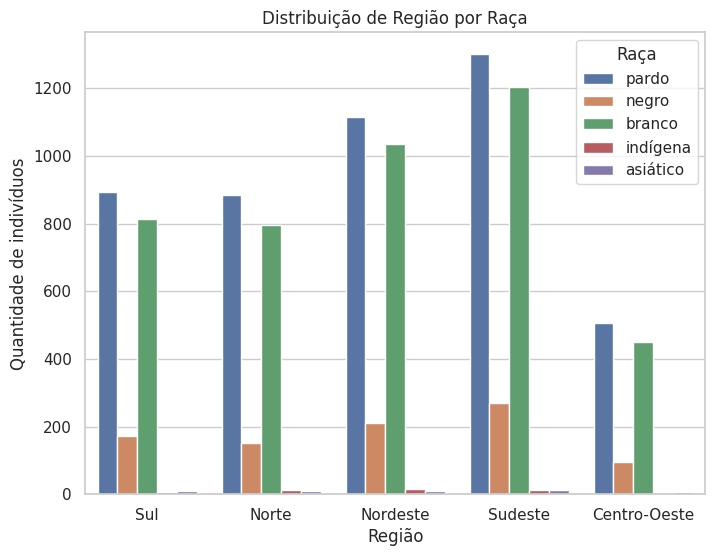

In [120]:
estado_raca = df.groupby("Região")["Raça"].count()
plt.figure(figsize=(8, 6))
sns.countplot(x="Região", hue="Raça", data=df)
plt.ylabel("Quantidade de indivíduos")
plt.title("Distribuição de Região por Raça")
plt.legend(title="Raça")
plt.show()

# Aqui vemos uma distribuição perfeitamente proporcional.
# No entanto, vale lembrar que as regiões têm distribuição desigual de raças segundo o IBGE.
# De maneira que podem parecer bem representados, mas alguns grupos estão sub e outros sobrerepresentados.

* ## Distribuição por Regiao

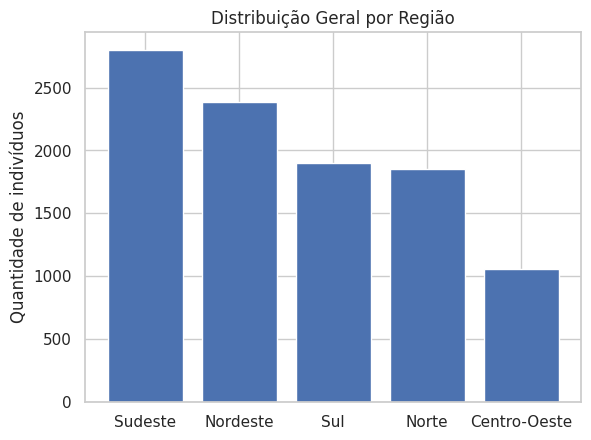

In [121]:
soma_regiao = df["Região"].value_counts()

plt.bar(soma_regiao.index, soma_regiao.values)
plt.title("Distribuição Geral por Região")
plt.ylabel("Quantidade de indivíduos")
plt.show()

# As operações da empresa têm tamanho diferente nas regiões do país.

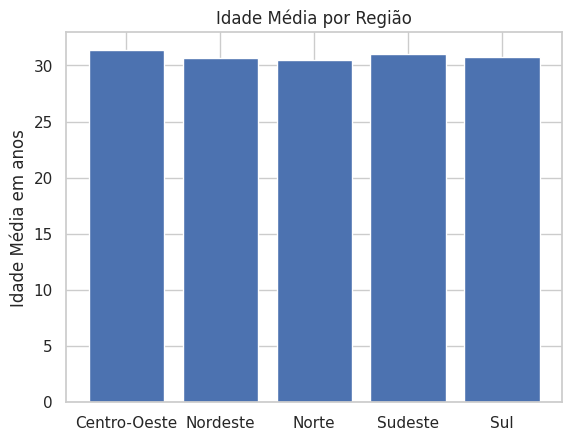

In [122]:
regiao_idade = df.groupby("Região")["Idade"].mean()

plt.bar(regiao_idade.index, regiao_idade.values)
plt.ylabel("Idade Média em anos")
plt.title("Idade Média por Região")
plt.show()

# Idade média é praticamente a mesma para todas as regiões.

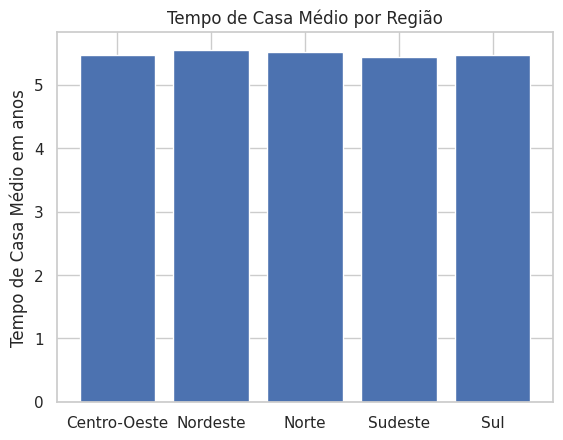

In [123]:
tempo_regiao_medio = df.groupby("Região")["Tempo de casa"].mean()

plt.bar(tempo_regiao_medio.index, tempo_regiao_medio.values)
plt.ylabel("Tempo de Casa Médio em anos")
plt.title("Tempo de Casa Médio por Região")
plt.show()

# Tempo médio de casa é praticamente o mesmo em todas as regiões.

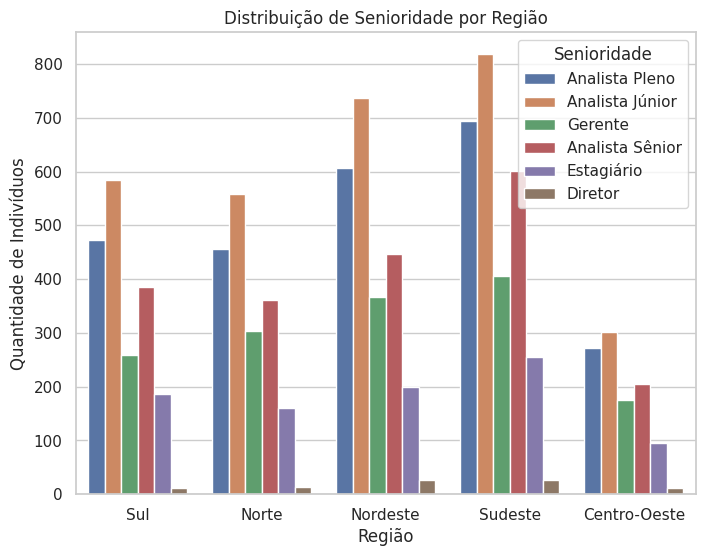

In [124]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Região", hue="Senioridade", data=df)
plt.ylabel("Quantidade de Indivíduos")
plt.title("Distribuição de Senioridade por Região")
plt.show()

# As quantidades são desiguais, pois o tamanho da operação é diferente.
# Em termos de proporções, vemos muitos analistas sênior no sul e sudeste, poucos analista júnior no centro oeste.

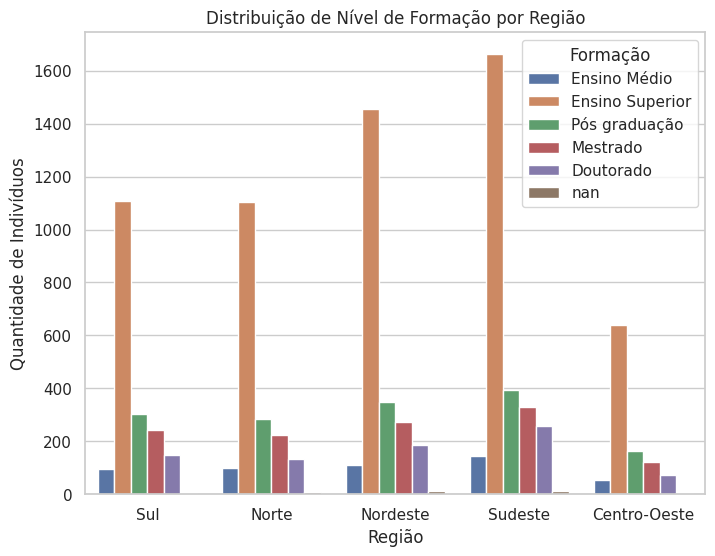

In [125]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Região", hue="Formação", data=df)
plt.ylabel("Quantidade de Indivíduos")
plt.title("Distribuição de Nível de Formação por Região")
plt.show()

# Em todas as regiões vemos uma distribuição proporcional.

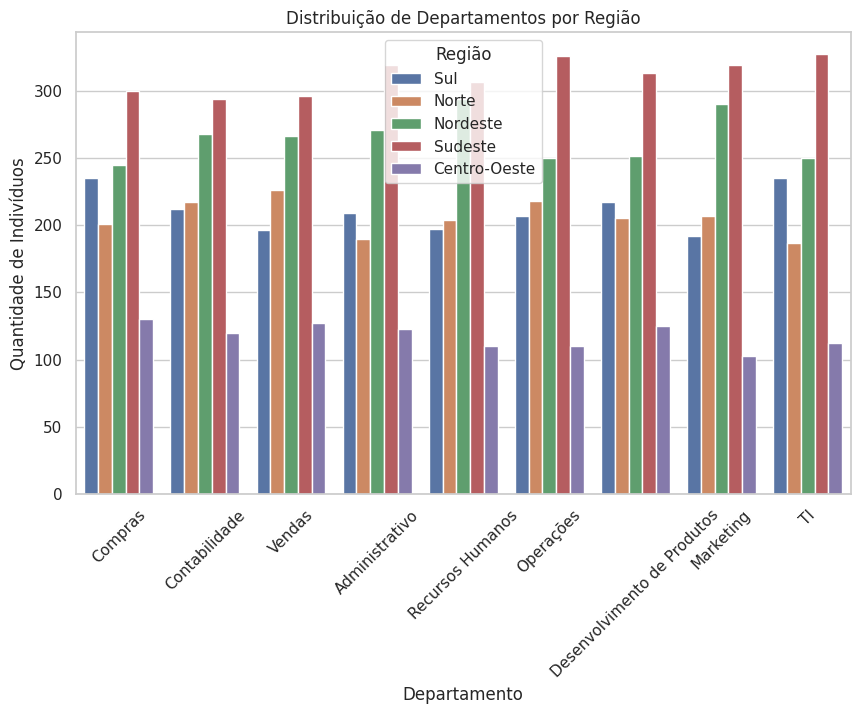

In [126]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Departamento", hue="Região", data=df)
plt.xticks(rotation=45)
plt.ylabel("Quantidade de Indivíduos")
plt.title("Distribuição de Departamentos por Região")
plt.show()

# Aqui há alguma variação, mas não indica concentração de tomada de decisões ou algo do tipo.

* ## Distribuição de Idade

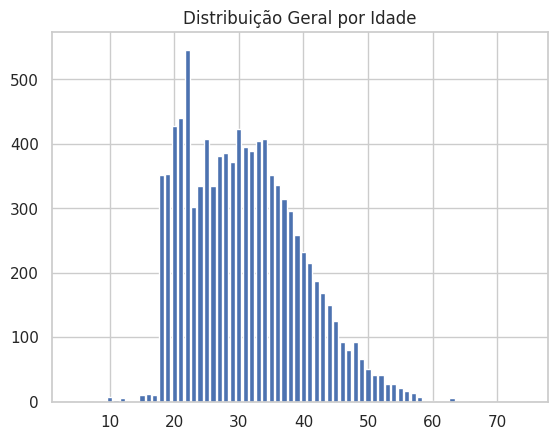

In [127]:
conta_idade = df["Idade"].value_counts()

plt.bar(conta_idade.index, conta_idade.values)
plt.title("Distribuição Geral por Idade")
plt.show()

# Equipe jovem, em torno de 50% dos indivíduos entre 20-40 anos, com acentuada queda após essa idade.
# Mas, como vimos anteriormente, estes dados não são precisos e confiáveis.

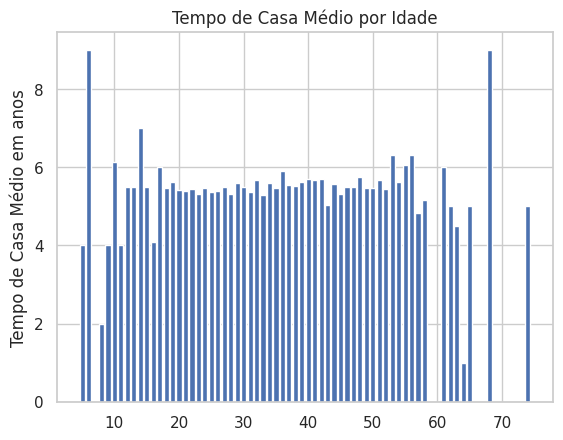

In [128]:
tempo_idade_medio = df.groupby("Idade")["Tempo de casa"].mean()

plt.bar(tempo_idade_medio.index, tempo_idade_medio.values)
plt.ylabel("Tempo de Casa Médio em anos")
plt.title("Tempo de Casa Médio por Idade")
plt.show()

# O tempo médio de permanência na empresa é uniforme para a maioria das idades
# O que sugere que jovens e velhos possuem os mesmos hábitos
# Lembrando que aqui também há dados não confiáveis,
# Por exemplo, temos um indivíduo com menos de 10 anos de idade e 9 anos de empresa!

C:\Users\cleverG\AppData\Local\Temp\ipykernel_66224\4079079573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Senioridade", y="Idade", palette="muted")


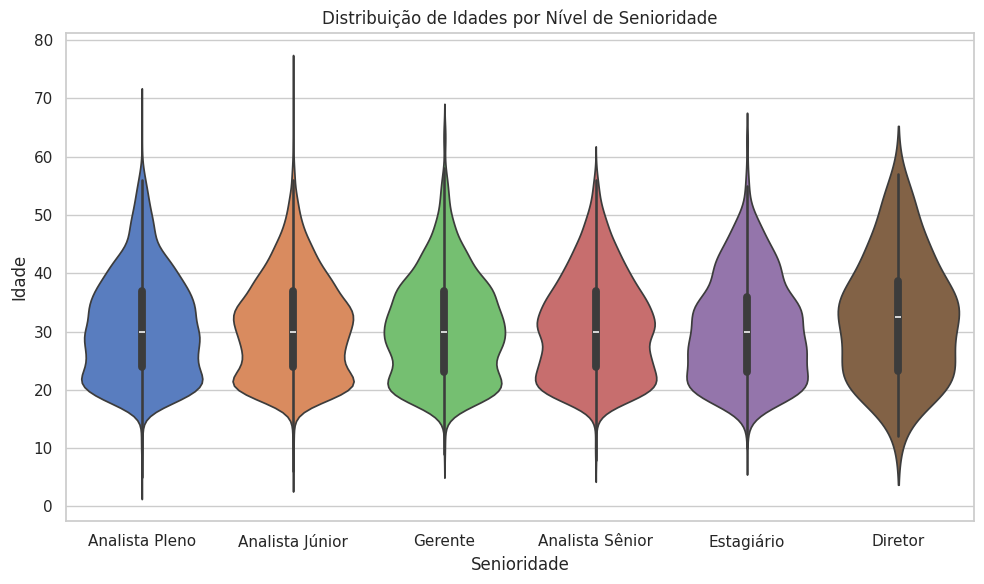

In [129]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Senioridade", y="Idade", palette="muted")
plt.ylabel("Idade")
plt.title("Distribuição de Idades por Nível de Senioridade")
plt.tight_layout()
plt.show()

# Temos um problema sério com o registro de idades no nosso dataset!!!
# De acordo com o gráfico, temos diretores menores de idade!!!

C:\Users\cleverG\AppData\Local\Temp\ipykernel_66224\1963151455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Formação", y="Idade", palette="muted")


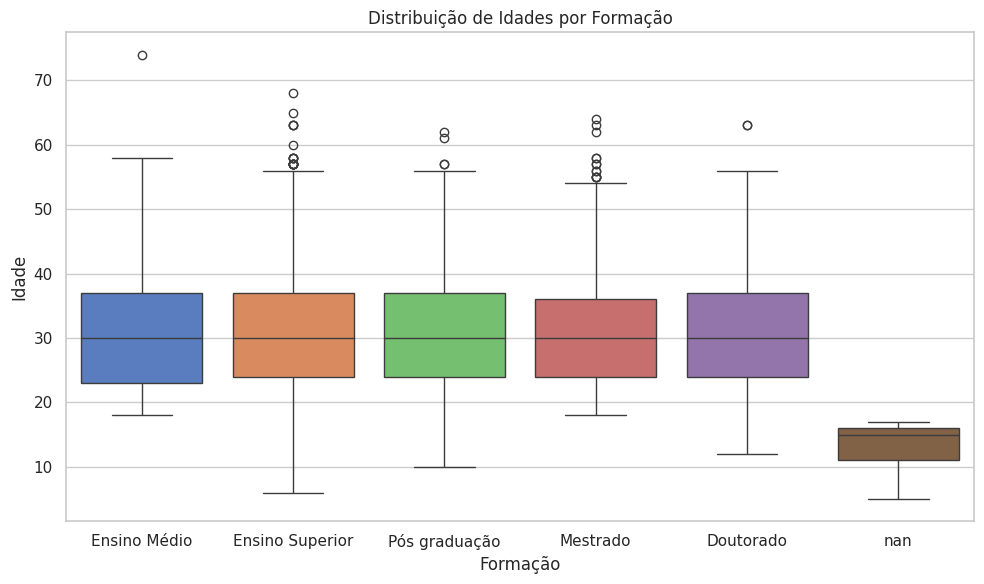

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Formação", y="Idade", palette="muted")
plt.ylabel("Idade")
plt.title("Distribuição de Idades por Formação")
plt.tight_layout()
plt.show()

# Temos graduados com menos de 10 anos e alguém no ensino médio com mais de 70 anos!!!
# Embora seja possível existir alguém acima de 70 nos estágios iniciais dos estudos, é muito improváve que
# essa pessoa esteja trabalhando em uma empresa.

C:\Users\cleverG\AppData\Local\Temp\ipykernel_66224\3026577770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Departamento", y="Idade", palette="muted")


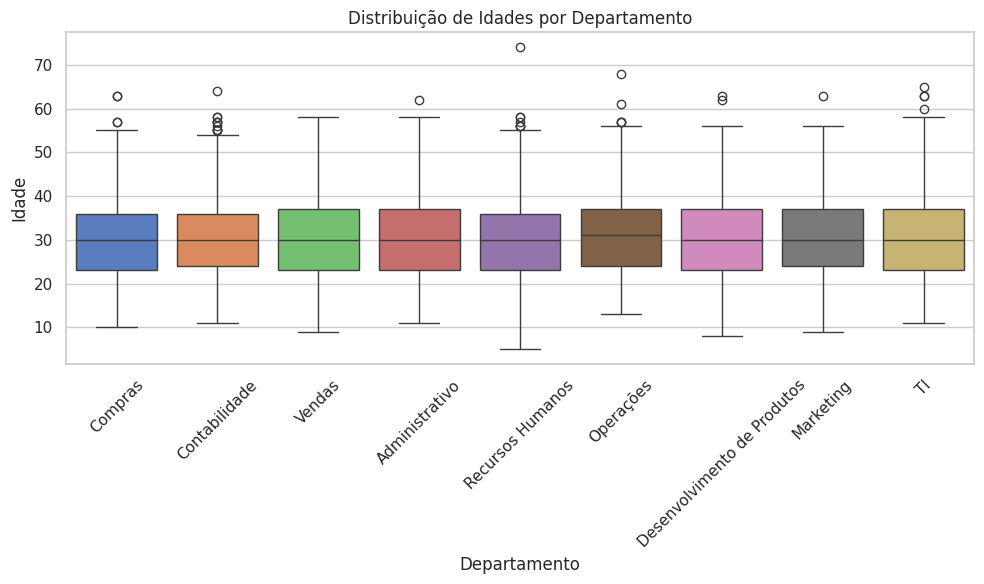

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Departamento", y="Idade", palette="muted")
plt.xticks(rotation=45)
plt.ylabel("Idade")
plt.title("Distribuição de Idades por Departamento")
plt.tight_layout()
plt.show()

# O RH tem os funcionários mais jovens e também os mais velhos.

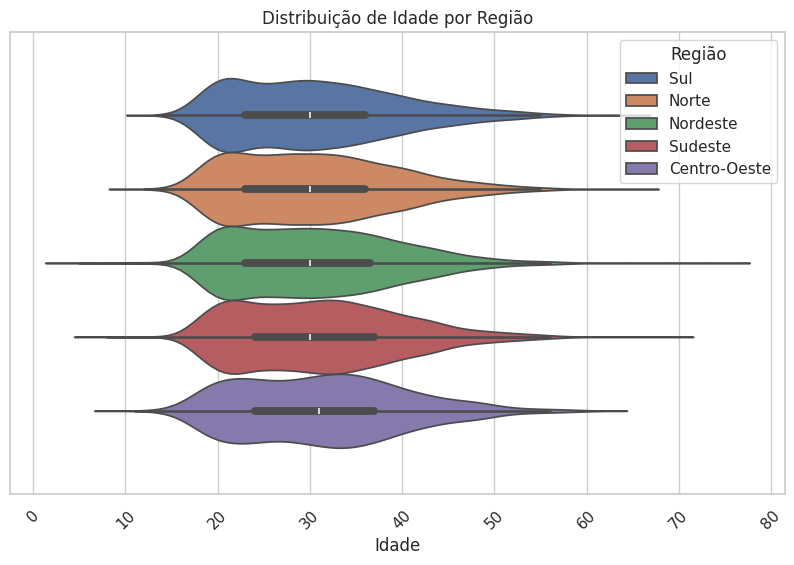

In [132]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Idade", hue="Região", data=df)
plt.xticks(rotation=45)
plt.title("Distribuição de Idade por Região")
plt.show()

# No nordeste estão os funcionários mais jovens (com idade próxima de 0) e também os mais velhos.

* ## Distribuição de Senioridade

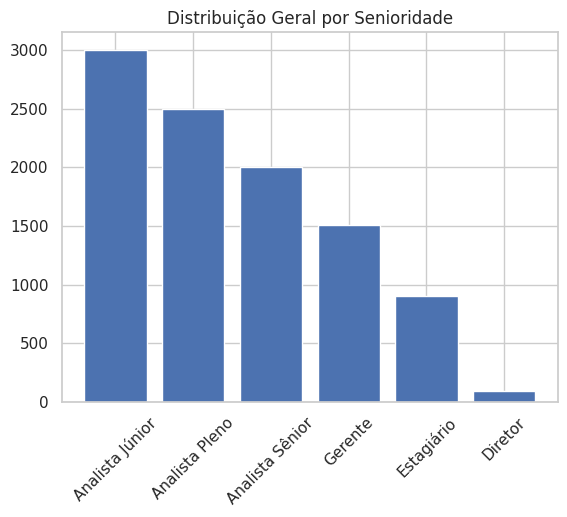

In [133]:
conta_senior = df["Senioridade"].value_counts()

plt.bar(conta_senior.index, conta_senior.values)
plt.xticks(rotation=45)
plt.title("Distribuição Geral por Senioridade")
plt.show()

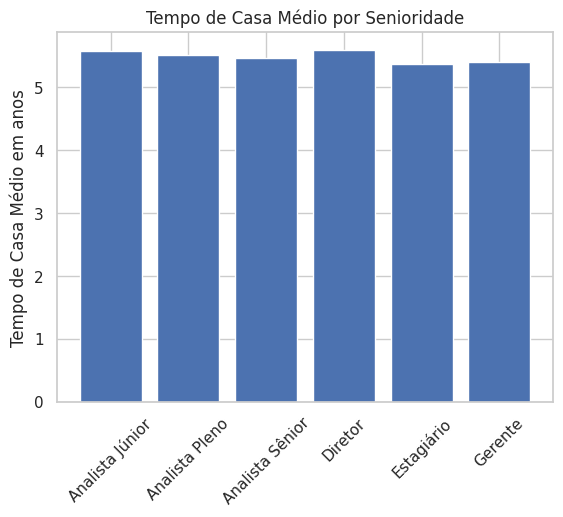

In [134]:
tempo_senior_medio = df.groupby("Senioridade")["Tempo de casa"].mean()

plt.bar(tempo_senior_medio.index, tempo_senior_medio.values)
plt.xticks(rotation=45)
plt.ylabel("Tempo de Casa Médio em anos")
plt.title("Tempo de Casa Médio por Senioridade")
plt.show()

# Aqui um fenômeno estranho, pois todas as senioridades apresentam um tempo de casa similar
# No entanto, é muito improvável que o tempo médio de permanência de um estagiário seja de 5 anos.

# Outra observação é que não sabemos se a pessoa está na mesma senioridade durante todo o seu tempo de casa
# ou se em algum momento ela foi promovida.

C:\Users\cleverG\AppData\Local\Temp\ipykernel_66224\1072114559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Senioridade", y="Tempo de casa", palette="muted")


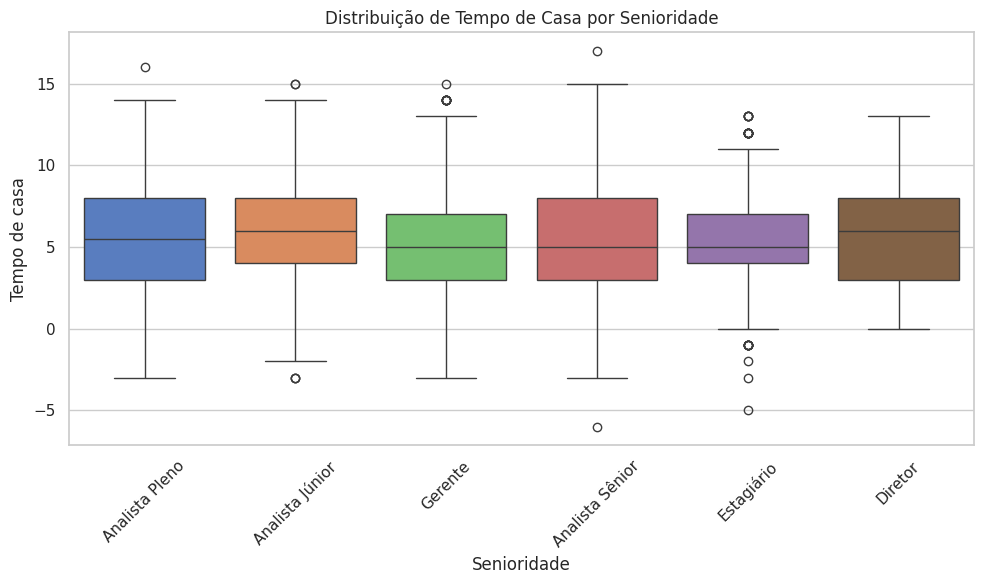

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Senioridade", y="Tempo de casa", palette="muted")
plt.xticks(rotation=45)
plt.ylabel("Tempo de casa")
plt.title("Distribuição de Tempo de Casa por Senioridade")
plt.tight_layout()
plt.show()

# Conferimos a distribuição real e encontramos valores absurdos.
# Em todo caso, se apenas desprezarmos os dados nulos e negativos, temos que o tempo de permanência na empresa
# é bastante elevado e não raramente passa de 10 anos.
# Isso indica que a empresa conta com um bom ambiente laboral.

C:\Users\cleverG\AppData\Local\Temp\ipykernel_66224\2053952512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Senioridade", y="Formação", palette="muted")


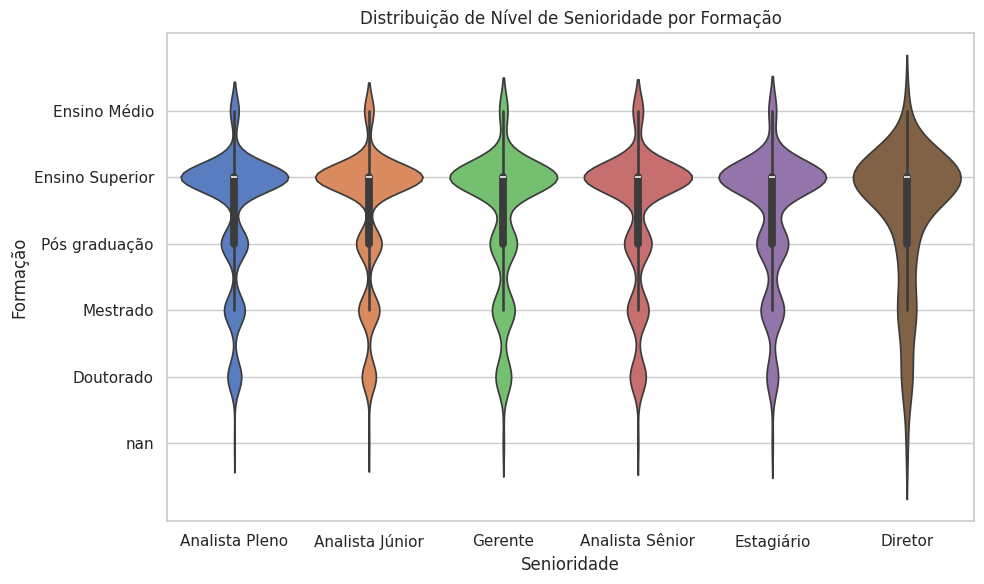

In [136]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Senioridade", y="Formação", palette="muted")
plt.title("Distribuição de Nível de Senioridade por Formação")
plt.tight_layout()
plt.show()

# Temos todas as senioridades no ensino médio...
# Precisamos conversar com a equipe responsável pela manutenção do banco de dados com urgência!!

* ## Distribuição por Departamento

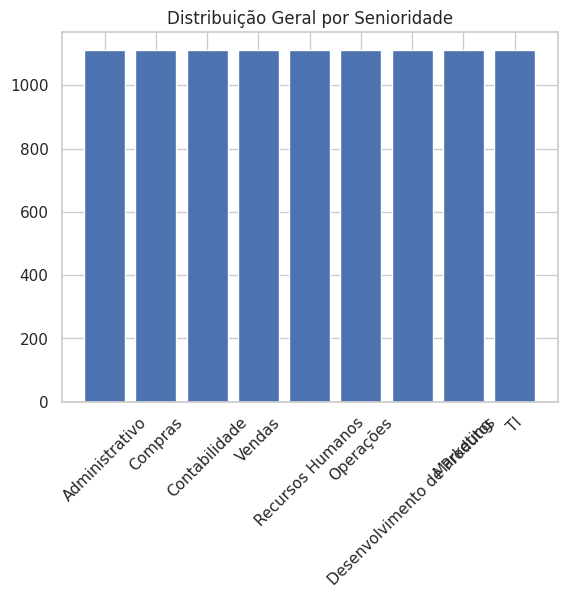

In [137]:
conta_departamento = df["Departamento"].value_counts()

plt.bar(conta_departamento.index, conta_departamento.values)
plt.xticks(rotation=45)
plt.title("Distribuição Geral por Senioridade")
plt.show()

# Todos os departamentos têm disttribuição exatamente igual em termos de senioridade.

C:\Users\cleverG\AppData\Local\Temp\ipykernel_66224\2791601720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Departamento", y="Tempo de casa", palette="muted")


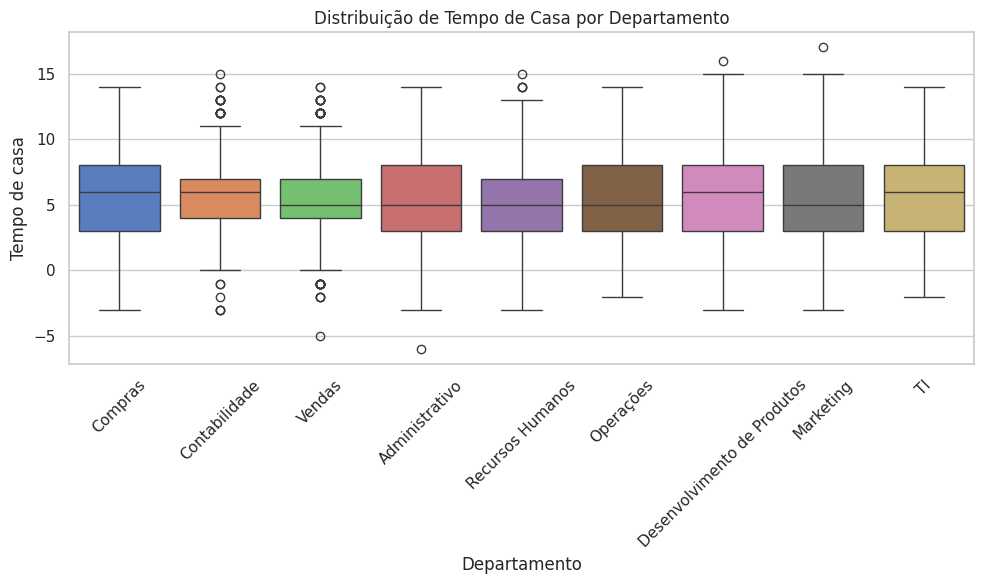

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Departamento", y="Tempo de casa", palette="muted")
plt.xticks(rotation=45)
plt.ylabel("Tempo de casa")
plt.title("Distribuição de Tempo de Casa por Departamento")
plt.tight_layout()
plt.show()

# Todos os deparmentos apresentam indivíduos com tempo de casa negativo

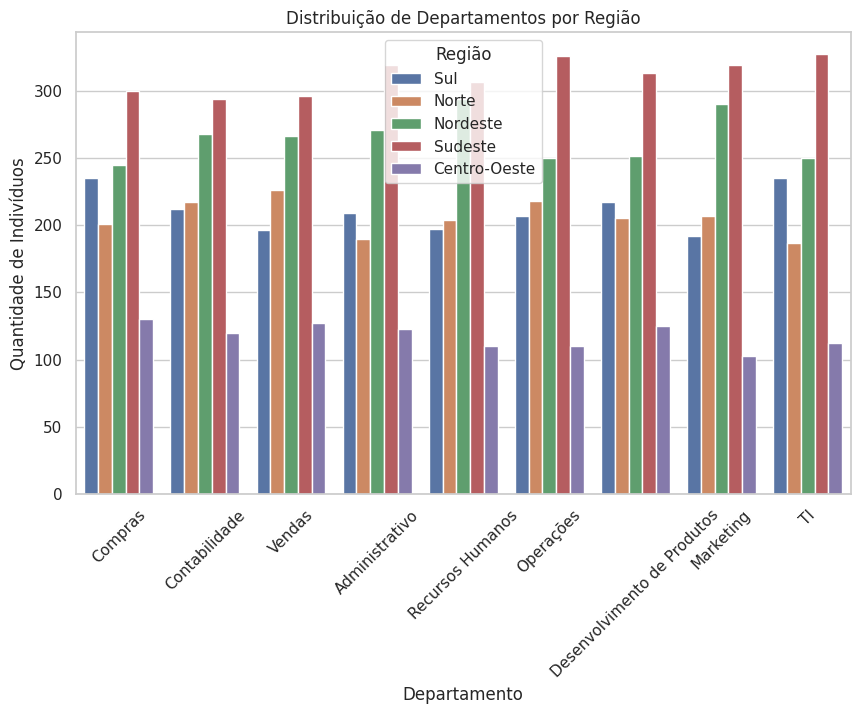

In [139]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Departamento", hue="Região", data=df)
plt.xticks(rotation=45)
plt.ylabel("Quantidade de Indivíduos")
plt.title("Distribuição de Departamentos por Região")
plt.show()

# As regiões sul e norte apresentam a maior variação de tamanho dos departamentos.

## Análises Comparativas

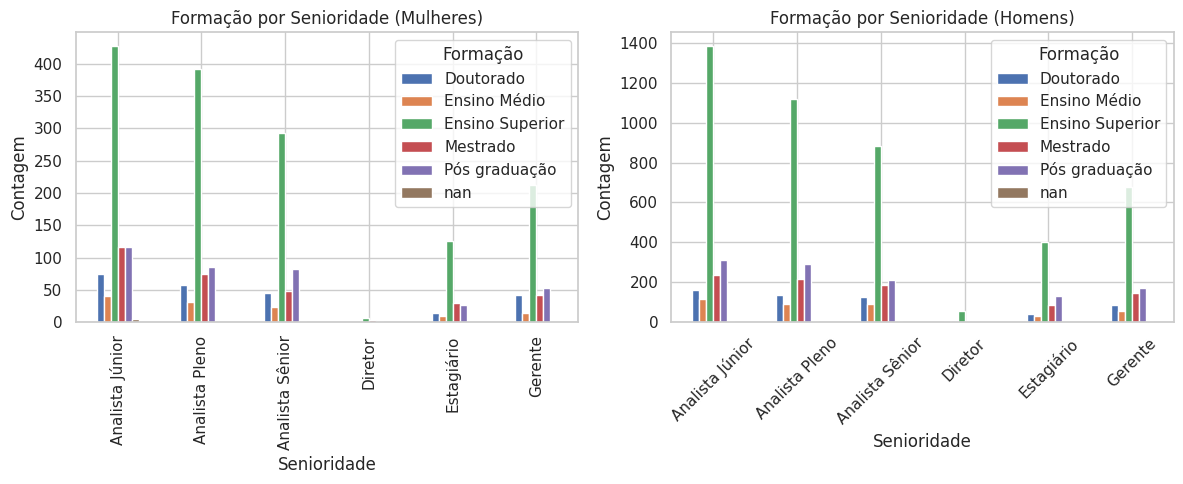

In [140]:
df_women = df[df["Gênero"] == "Fem"]
df_men = df[df["Gênero"] == "Masc"]

grouped_women = df_women.groupby(["Senioridade", "Formação"]).size().unstack()
grouped_men = df_men.groupby(["Senioridade", "Formação"]).size().unstack()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para mulheres
grouped_women.plot(kind="bar", ax=ax1, label="Mulheres")
plt.xticks(rotation=45)
ax1.set_xlabel("Senioridade")
ax1.set_ylabel("Contagem")
ax1.set_title("Formação por Senioridade (Mulheres)")

# Gráfico para homens
grouped_men.plot(kind="bar", ax=ax2, label="Homens")
plt.xticks(rotation=45)
ax2.set_xlabel("Senioridade")
ax2.set_ylabel("Contagem")
ax2.set_title("Formação por Senioridade (Homens)")

plt.tight_layout()
plt.show()

# Há mais mulheres com mestrado, doutorado e pós graduação nos cargos de analista, em relação aos homens.

## Análises com dados Externos

### Utilizando dados do IBGE

Dados da distribuição da população por Cor ou Raça

Dados da distribuição da população por Gênero

Fonte de dados: https://censo2022.ibge.gov.br/panorama/

In [141]:
# Carregando dados do IBGE

caminho_csv_racas = "IBGE/Censo 2022 - População por cor ou raça - Brasil.csv"
caminho_csv_generos = "IBGE/Censo 2022 - População por sexo - Brasil.csv"

df_panorama_brasil_raca = pd.read_csv(
    caminho_csv_racas,
    delimiter=";",
    usecols=[
        0,
        1,
        2,
    ],  # Especifica que apenas as primeiras três colunas devem ser lidas
    skip_blank_lines=True,
)

df_panorama_brasil_genero = pd.read_csv(
    caminho_csv_generos,
    delimiter=";",
    usecols=[
        0,
        1,
        2,
    ],  # Especifica que apenas as primeiras três colunas devem ser lidas
    skip_blank_lines=True,
)

### Distribuição por Raça, Brasil vs Empresa

In [142]:
# Define um dicionário de mapeamento
mapping_dict = {
    "Branca": "branco",
    "Preta": "negro",
    "Amarela": "asiático",
    "Parda": "pardo",
    "Indígena": "indígena",
}

df_panorama_brasil_raca["Cor ou raça"] = df_panorama_brasil_raca["Cor ou raça"].map(
    mapping_dict
)

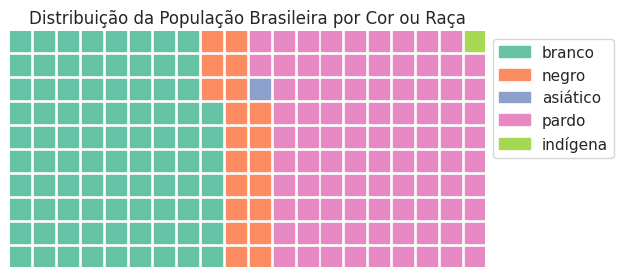

In [143]:
# Criar um dicionário para o gráfico de waffle
waffle_data = df_panorama_brasil_raca.set_index("Cor ou raça")[
    "População (pessoas)"
].to_dict()

# Criar um gráfico de waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=waffle_data,
    legend={"loc": "upper left", "bbox_to_anchor": (1, 1)},
)

plt.title("Distribuição da População Brasileira por Cor ou Raça")
plt.show()

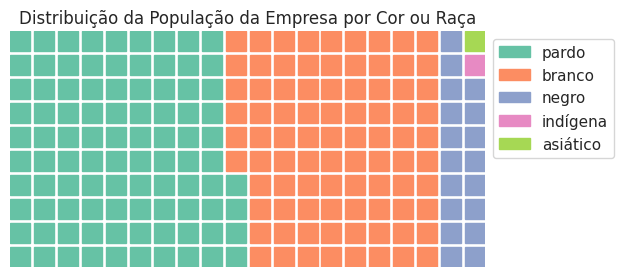

In [144]:
# Elaborando a mesma comparação agora com dados do df
waffle_data_df = df["Raça"].value_counts().to_dict()

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=waffle_data_df,
    legend={"loc": "upper left", "bbox_to_anchor": (1, 1)},
)

plt.title("Distribuição da População da Empresa por Cor ou Raça")
plt.show()

# Percebe-se que a empresa tem uma distribuição racial praticamente igual à distribuição nacional.

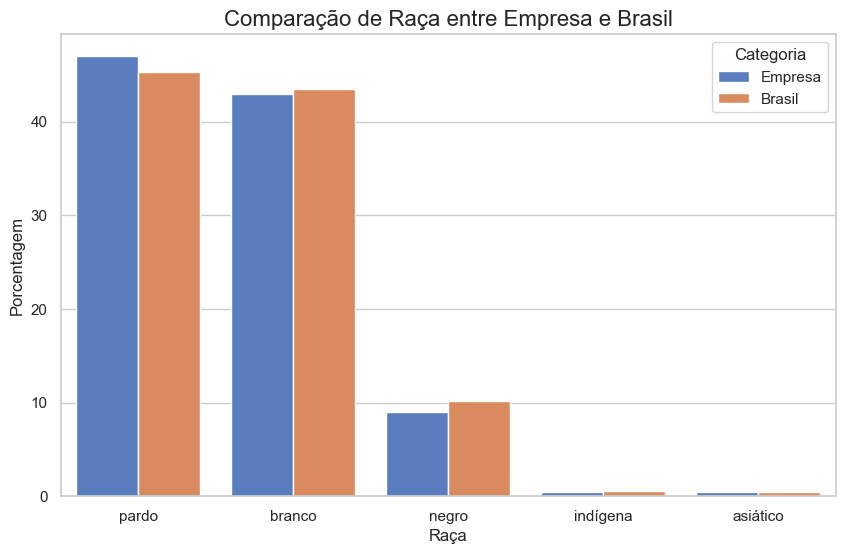

In [145]:
# Calculando a distribuição de raças na empresa
raca_counts_empresa = df["Raça"].value_counts(normalize=True) * 100

# Calculando a distribuição de raças no Brasil
total_populacao_brasil = df_panorama_brasil_raca["População (pessoas)"].sum()
df_panorama_brasil_raca["Porcentagem"] = (
    df_panorama_brasil_raca["População (pessoas)"] / total_populacao_brasil
) * 100

data = {
    "Empresa": raca_counts_empresa,
    "Brasil": df_panorama_brasil_raca.set_index("Cor ou raça")["Porcentagem"],
}

df_comparacao = pd.DataFrame(data).fillna(0)  # preenche os valores ausentes com 0

df_comparacao.reset_index(inplace=True)
df_comparacao.rename(columns={"index": "Raça"}, inplace=True)
df_long = pd.melt(
    df_comparacao,
    id_vars="Raça",
    value_vars=["Empresa", "Brasil"],
    var_name="Categoria",
    value_name="Porcentagem",
)

df_long["Total Porcentagem"] = df_long.groupby("Raça")["Porcentagem"].transform("sum")

df_long.sort_values("Total Porcentagem", ascending=False, inplace=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Raça",
    y="Porcentagem",
    hue="Categoria",
    data=df_long,
    palette="muted",
    order=df_long["Raça"].unique(),
)

plt.title("Comparação de Raça entre Empresa e Brasil", fontsize=16)
plt.xlabel("Raça", fontsize=12)
plt.ylabel("Porcentagem", fontsize=12)
plt.legend(title="Categoria")

plt.show()

Verificando a distribuição por região:

In [146]:
# Caminhos dos arquivos CSV do IBGE
regioes_ibge = ["Centro-Oeste", "Nordeste", "Norte", "Sudeste", "Sul"]
arquivos_ibge = {
    regiao: f"IBGE/Censo 2022 - População por cor ou raça - {regiao}.csv"
    for regiao in regioes_ibge
}

# Carregar os dados do IBGE
dados_ibge = {}
for regiao, caminho in arquivos_ibge.items():
    dados_ibge[regiao] = pd.read_csv(
        caminho, delimiter=";", usecols=[0, 1, 2], skip_blank_lines=True
    )
    dados_ibge[regiao]["Cor ou raça"] = dados_ibge[regiao]["Cor ou raça"].map(
        mapping_dict
    )
    dados_ibge[regiao]["Porcentagem"] = (
        dados_ibge[regiao]["População (pessoas)"]
        / dados_ibge[regiao]["População (pessoas)"].sum()
    ) * 100

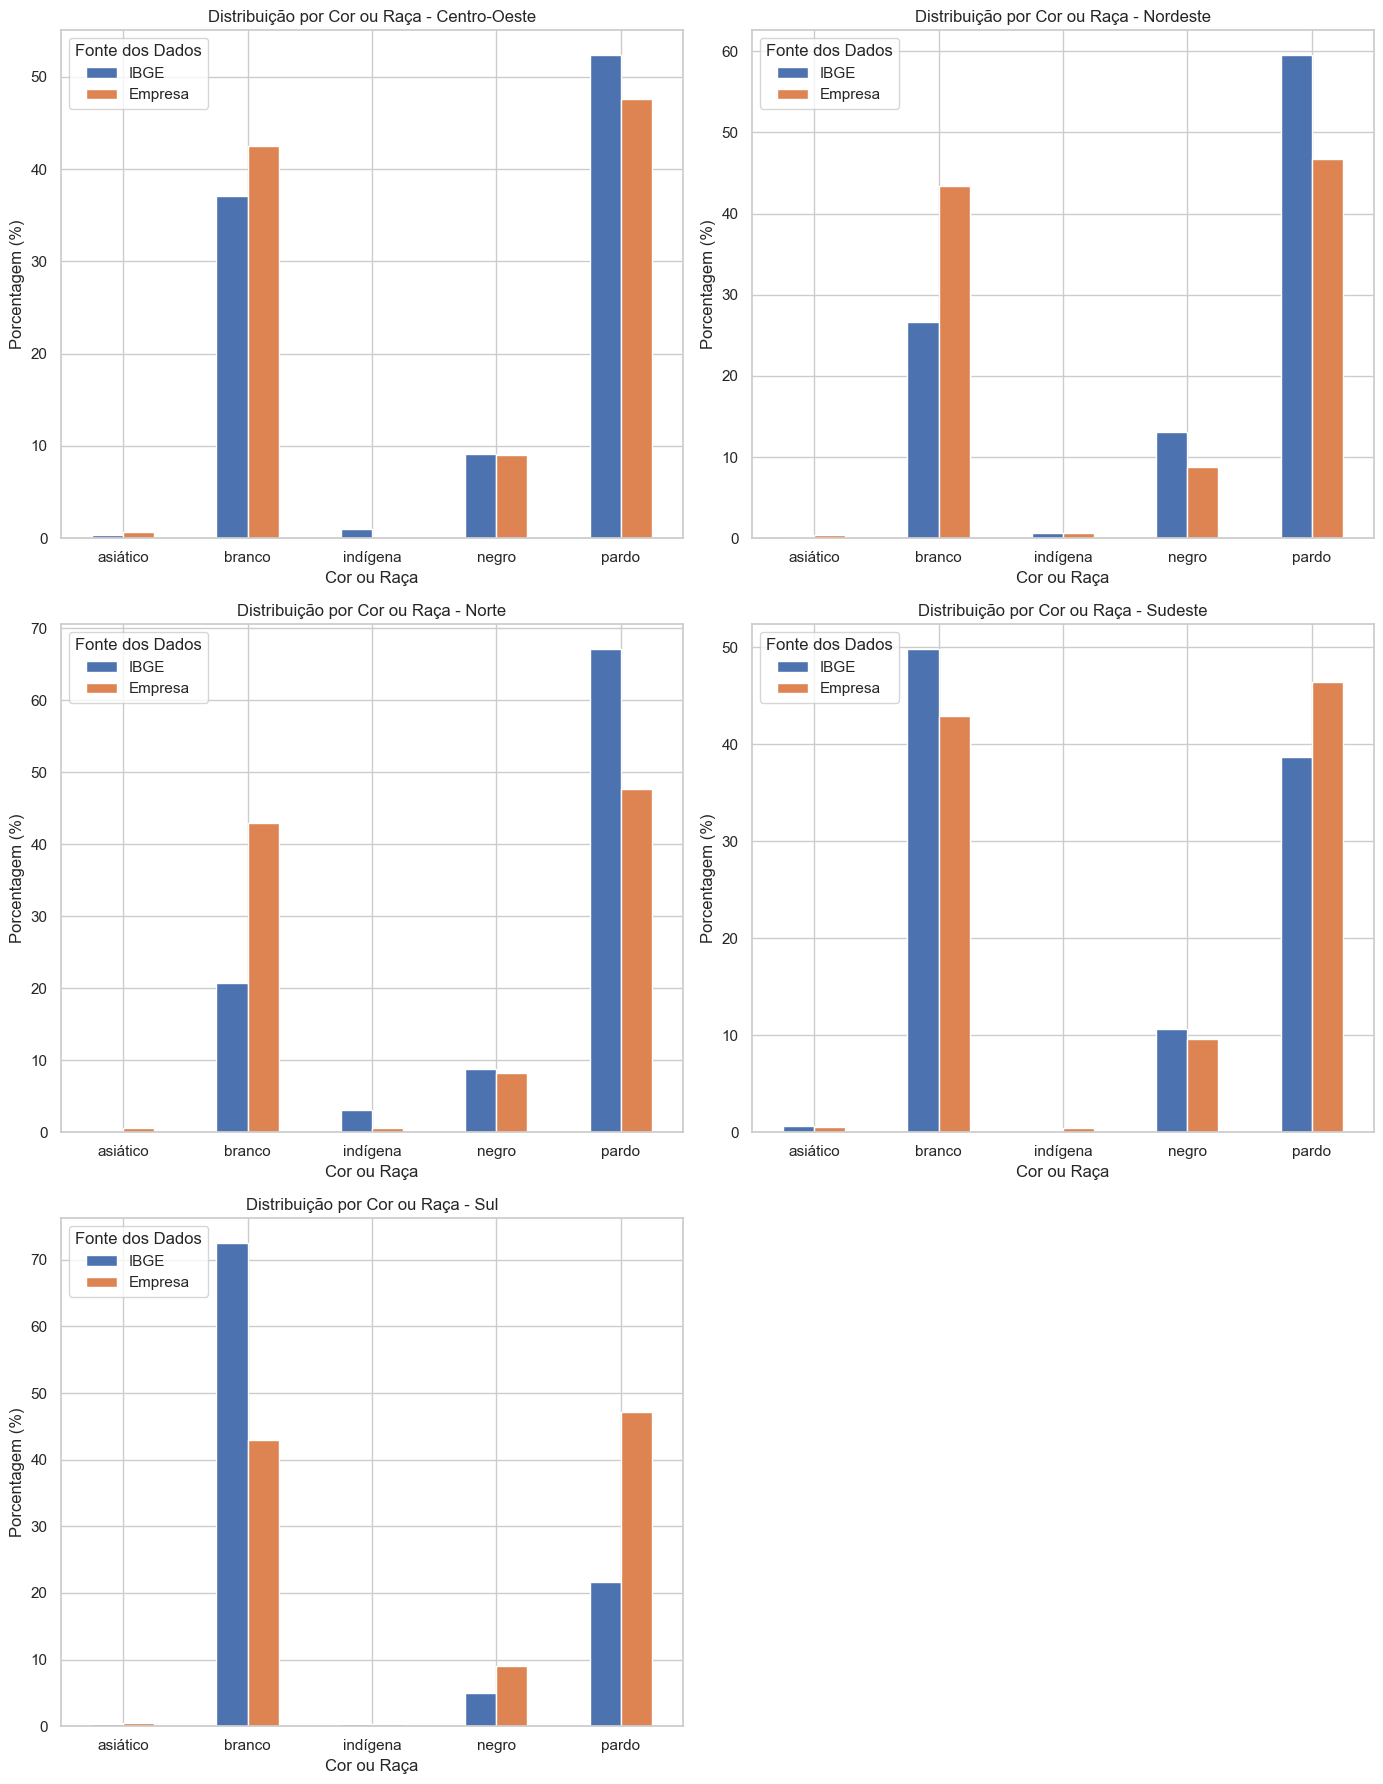

In [147]:
# Configurações do plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

regioes_ibge = ["Centro-Oeste", "Nordeste", "Norte", "Sudeste", "Sul"]

for i, regiao in enumerate(regioes_ibge):
    ax = axes[i]
    # Dados do IBGE e da empresa para a região
    ibge_data = dados_ibge[regiao].set_index("Cor ou raça")["Porcentagem"]
    empresa_data = empresa_por_regiao.loc[regiao]

    # Preparar dados para o plot
    data = pd.DataFrame({"IBGE": ibge_data, "Empresa": empresa_data}).fillna(0)
    data.plot(kind="bar", ax=ax, rot=0)
    ax.set_title(f"Distribuição por Cor ou Raça - {regiao}")
    ax.set_xlabel("Cor ou Raça")
    ax.set_ylabel("Porcentagem (%)")
    ax.legend(title="Fonte dos Dados", loc="upper left")

axes[5].set_visible(False)

plt.tight_layout()
plt.show()

# Podemos notar algumas divergencias na distribuição pontual para algumas regiões, mas no geral a distribuição é similar.
# Na região Nordeste, temos uma diferença mais significativa, com maior pressença de branca na empresa do que na população em geral.
# Para a região Norte, temos uma diferença significativa na presença de brancos na empresa em relação à população em geral.
# Já para a região Sul, temos uma diferença significativa na pressença de pardos na empresa em relação à população em geral.

### Distribuição por gêneros, Brasil vs Empresa

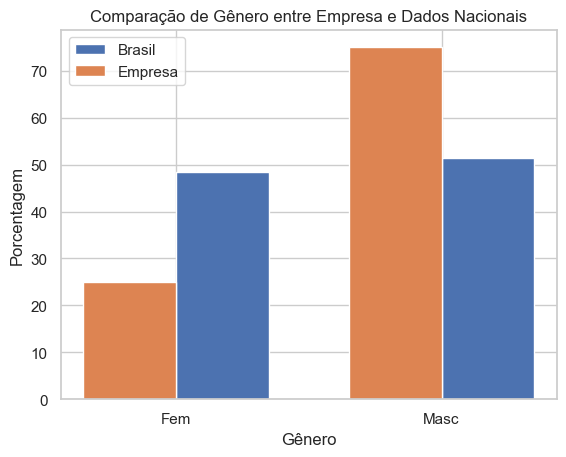

In [148]:
# Calculando a porcentagem de gênero na empresa
genero_counts = df["Gênero"].value_counts(normalize=True) * 100

total_nacional = df_panorama_brasil_genero["População(pessoas)"].sum()
df_panorama_brasil_genero["População (%)"] = (
    df_panorama_brasil_genero["População(pessoas)"] / total_nacional
) * 100

df_panorama_brasil_genero.sort_values("Sexo", inplace=True)
genero_counts.sort_index(inplace=True)

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(genero_counts))

bars1 = ax.bar(
    index + bar_width,
    df_panorama_brasil_genero["População (%)"],
    bar_width,
    label="Brasil",
)
bars2 = ax.bar(index, genero_counts.values, bar_width, label="Empresa")

ax.set_xlabel("Gênero")
ax.set_ylabel("Porcentagem")
ax.set_title("Comparação de Gênero entre Empresa e Dados Nacionais")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(genero_counts.index)
ax.legend()

plt.show()

# Aqui a maior discrepância dos nossos dados: a baixa participação das mulheres no quadro de pessoal.

## Análises de correlação

A correlação de Pearson mede a associação linear entre variáveis contínuas. É o valor que indica o quanto a relação entre as variáveis pode ser descrita por uma reta.
Interpretando o valor de ρ

    0.9 a 1 positivo ou negativo indica uma correlação muito forte.
    0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    0 a 0.3 positivo ou negativo indica uma correlação desprezível.

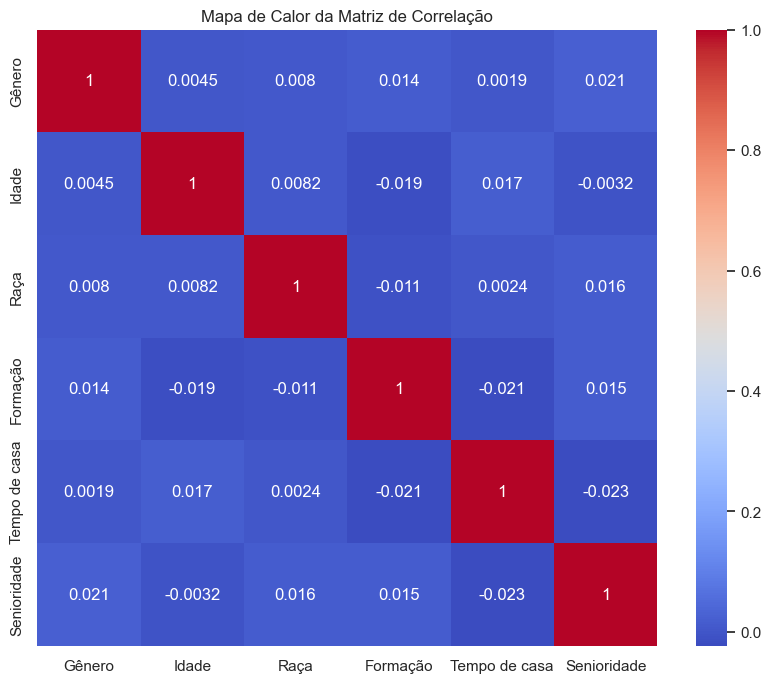

In [149]:
# Criar uma cópia do DataFrame, para veriicar as correlações
df_corr = df.copy()

# Converter as colunas categóricas para numéricas
label_encoder = LabelEncoder()
df_corr["Gênero"] = label_encoder.fit_transform(df_corr["Gênero"])
df_corr["Raça"] = label_encoder.fit_transform(df_corr["Raça"])
df_corr["Formação"] = label_encoder.fit_transform(df_corr["Formação"])
df_corr["Senioridade"] = label_encoder.fit_transform(df_corr["Senioridade"])

# Selecionar as colunas de interesse
df_corr = df_corr[
    ["Gênero", "Idade", "Raça", "Formação", "Tempo de casa", "Senioridade"]
]

# Calcular a matriz de correlação
correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Mapa de Calor da Matriz de Correlação")
plt.show()

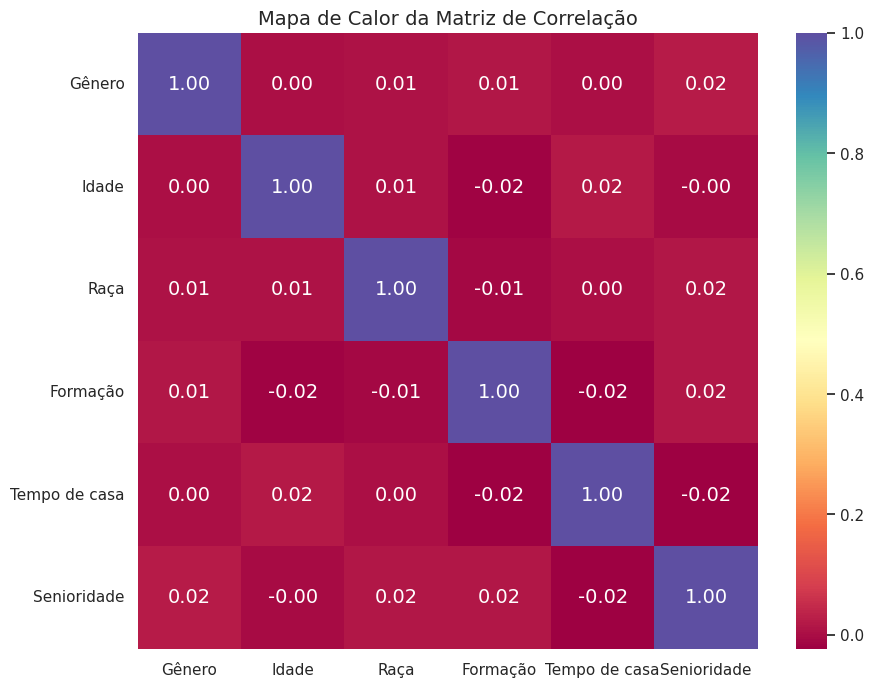

In [150]:
# Melhorias gráficas

rcParams["font.size"] = 12
rcParams["font.family"] = "DejaVu Sans"

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, annot=True, cmap="Spectral", fmt=".2f", annot_kws={"size": 14}
)

plt.title("Mapa de Calor da Matriz de Correlação", fontsize=14, fontname="DejaVu Sans")
plt.show()

O valor mais alto de correlação é apenas 0.023, indicando uma correlação muito fraca entre as variáveis. Isso significa que não há uma relação linear forte entre elas. No entanto, uma correlação baixa não descarta completamente uma relação entre as variáveis. Podem existir relações não lineares ou influências de outras variáveis. Existem outras técnicas estatísticas que podemos usar para obter insights valiosos!

### Ao final dessa extensa análise observamos que:

### De maneira geral, não há preconceito de raça ou gênero. Embora presentes em menor quantidade, mulheres e grupos raciais minoritários participam de todos os níveis de senioridade e formação.

### Não parece haver relação entre as variáveis, ou, dito de outra forma, os cargos não dependem de um gênero, raça e nem sequer de formação. A empresa parece valorizar resultados.

### Há baixa presença de pessoas acima de 40 anos, o que pode ser resultado dos problemas da estrutura do banco de bancos.

### De modo geral, o tempo de permenência médio é superior a 5 anos, o que sugere um ambiente laboral saudável.

### Também não há concentração de cargos diretivos em uma região, pelo que se pode entender que as decisões são descentralizadas.

### Identificamos apenas 2 gêneros: feminino e masculino. Ou ninguém na empresa se identifica de outra maneira ou o banco de dados não aceita outra opção.

### Coluna duplicada, dados nulos, erro de digitação, valores inválidos e coluna com nome vago e pouco explicativo foram alguns dos problemas técnicos que pudemos identificar.

### Faltam dados importantes, como data de entrada e saída, promoções/mudança de cargo, salário e deficiência. Outras informações também podem ser colhidas para ajudar a definir o perfil dos funcionários e basear a tomada de decisões.